This Python-code runs the Python program 'run_polymer_simulation_once.ipynb' many times to obtain better statistics. Results-files are saved for each simulation and finally used to create an average of the quantities.

# Import of libraries 

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.optimize import curve_fit
import datetime

# Set datetime and create subfolder for results

In [2]:
#set current date and time
DATETIME = datetime.datetime.now()
current_datetime = (str(DATETIME.year)+str(DATETIME.month)+str(DATETIME.day)+
                   str(DATETIME.hour)+str(DATETIME.minute)+str(DATETIME.second))

#create a folder for results (if not exists already)
try:
    os.makedirs("results")

except FileExistsError:
    #directory already exists
    pass

#create directory in folder 'results' to save results from every single simulation
os.makedirs("results/"+current_datetime)

In [3]:
#make short pathname for directory with results
path_results = "results/"+current_datetime+"/"

# Initialization and calculation of basic parameters

Initial parameters (fixed values for all simulation) are defined in the Initialization. Then, they are written to another python-file, 'init_parameters.ipynb'. The program 'run_polymer_simulation_once.ipynb' load this initial parameters from the file 'init_parameters.py' every time it is called. Attention: This extra file 'init_parameters.ipynb' is needed because a python program cannot load variables from this file ('main_code.ipynb') while it is run.

In [4]:
#define number of polymers segments (monomers)
Monomers = 30

#define number of bonds between segments
Bonds = Monomers - 1

#define spring constant (Rouse model) for bonds between segments in units energy/distance^2
k = 1

#define drag-coefficient constant gamma
gamma = 1

#define temperature in units of kT
kT = 1

#define integration step time
dt = 10**(-4)

#define numer of point for graphical representation and used for fits (number of callbacks)
number_of_points = 1e3

In [5]:
#set epsilon and sigma for Lennard_jones potential between different particles
lj_epsilon_AA = 1.0
lj_sigma_AA = 1.0
lj_epsilon_AB = 1.0
lj_sigma_AB = 1.0
lj_epsilon_BB = 1.0
lj_sigma_BB = 1.0

#define rest distance between segments of polymer
#use r0 = lj_sigma_AA (spring's rest distance = distance between segment where LJ-potential = 0)
r0 = lj_sigma_AA

#set cut-off radius for potential between two particles
r_cut = 2**(1/6)*lj_sigma_AA

In [6]:
#calculate Kuhn length b
Kuhn_length_b = math.sqrt(3*kT/k)

#calculate Rouse time (Rouse mode = 1)
tau_rouse_theory = gamma*Monomers**2*Kuhn_length_b**2 / (3*np.pi**2*kT)

In [7]:
#define number of integration steps (e3 --> *1000, is written into files in correct digit-format)
integration_steps = int(tau_rouse_theory/dt*10)

#set number of executions of one entire simulation
number_of_simulations = 10

#define maximum time
t_max = dt*integration_steps

In [8]:
#calculate volume of one passive particle = 4/3*pi*(sigma/2)^3
volume_passive_particle = 4/3*np.pi*(lj_sigma_BB/2)**3

#set density of passive particles (inside simulation box)
density_passive_particles = 0.01

#set box_factor (x-, y- and z-length of simulation-box = box_factor * Monomers)
box_factor = 1.5

#calculate number of passive particles to obtain density as set above
n_passive_particles = int( (box_factor*Monomers)**3 *
                          density_passive_particles / volume_passive_particle )

#define number of active particles
n_active_particles = 0

Create file 'initial_values.py' and write the set parameters into it; this file is called every time when the simulation 'run_polymer_simulation_once.py' starts.

In [9]:
#write initial parameters in SAME directory as python-codes
file_init_parameters = open('initial_parameters.py', 'w')

init_parameters = (

    "current_datetime = "          +current_datetime+"\n"                +  
    "Monomers = "                  +str(Monomers)+"\n"                   +
    "Bonds = "                     +str(Bonds)+"\n"                      +
    "k = "                         +str(k)+"\n"                          +
    "n_passive_particles = "       +str(n_passive_particles)+"\n"        +
    "volume_passive_particle = "   +str(volume_passive_particle)+"\n"    +
    "density_passive_particles = " +str(density_passive_particles)+"\n"  +
    "n_active_particles = "        +str(n_active_particles)+"\n"         +
    "lj_epsilon_AA = "             +str(lj_epsilon_AA)+"\n"              +
    "lj_sigma_AA = "               +str(lj_sigma_AA)+"\n"                +
    "lj_epsilon_AB = "             +str(lj_epsilon_AB)+"\n"              +
    "lj_sigma_AB = "               +str(lj_sigma_AB)+"\n"                +
    "lj_epsilon_BB = "             +str(lj_epsilon_BB)+"\n"              +
    "lj_sigma_BB = "               +str(lj_sigma_BB)+"\n"                +
    "box_factor = "                +str(box_factor)+"\n"                 +
    "r_cut = "                     +str(r_cut)+"\n"                      +
    "gamma = "                     +str(gamma)+"\n"                      +
    "r0 = "                        +str(r0)+"\n"                         +
    "kT = "                        +str(kT)+"\n"                         +
    "dt = "                        +str(dt)+"\n"                         +
    "integration_steps = "         +str(integration_steps)+"\n"          +
    "number_of_points = "          +str(number_of_points)+"\n"           +
    "number_of_simulations = "     +str(number_of_simulations)+"\n"      +
    "Kuhn_length_b = "             +str(Kuhn_length_b)+"\n"              +
    "tau_rouse_theory = "          +str(tau_rouse_theory)+"\n"           +
    "t_max = "                     +str(t_max))

file_init_parameters.write(init_parameters)

file_init_parameters.close()


In [10]:
#save initial parameters also in 'results/current_datetime' directory as .py and as .dat

file_init_parameters = open(path_results+'initial_parameters.py', 'w')
file_init_parameters.write(init_parameters)
file_init_parameters.close()

# Run the entire simulation many times (using for-loop)

In [11]:
#run the entire simulation 'run_polymer_simulation_once.ipynb' many times
for run in range(number_of_simulations):
    
    #execute entire simulation
    print ("Step "+str(run+1)+" out of "+str(number_of_simulations))
    %run run_polymer_simulation_once.ipynb

Step 1 out of 10
HOOMD-blue 2.6.0 DOUBLE HPMC_MIXED TBB SSE SSE2 SSE3 
Compiled: 05/29/2019
Copyright (c) 2009-2019 The Regents of the University of Michigan.
-----
You are using HOOMD-blue. Please cite the following:
* J A Anderson, C D Lorenz, and A Travesset. "General purpose molecular dynamics
  simulations fully implemented on graphics processing units", Journal of
  Computational Physics 227 (2008) 5342--5359
* J Glaser, T D Nguyen, J A Anderson, P Liu, F Spiga, J A Millan, D C Morse, and
  S C Glotzer. "Strong scaling of general-purpose molecular dynamics simulations
  on GPUs", Computer Physics Communications 192 (2015) 97--107
-----
HOOMD-blue is running on the CPU
0
notice(2): Group "all" created containing 1770 particles
notice(2): integrate.langevin/bd is using specified gamma values
notice(2): -- Neighborlist exclusion statistics -- :
notice(2): Particles with 0 exclusions             : 1740
notice(2): Particles with 1 exclusions             : 2
notice(2): Particles with 2

Time 00:17:40 | Step 2014992 / 9118906 | TPS 1867.38 | ETA 01:03:24
Time 00:17:50 | Step 2034028 / 9118906 | TPS 1903.58 | ETA 01:02:01
Time 00:18:00 | Step 2053189 / 9118906 | TPS 1916.01 | ETA 01:01:27
Time 00:18:10 | Step 2072320 / 9118906 | TPS 1913.08 | ETA 01:01:23
Time 00:18:20 | Step 2091482 / 9118906 | TPS 1916.12 | ETA 01:01:07
Time 00:18:30 | Step 2110665 / 9118906 | TPS 1918.24 | ETA 01:00:53
Time 00:18:40 | Step 2129815 / 9118906 | TPS 1914.87 | ETA 01:00:49
Time 00:18:50 | Step 2148979 / 9118906 | TPS 1916.36 | ETA 01:00:37
Time 00:19:00 | Step 2168139 / 9118906 | TPS 1915.96 | ETA 01:00:27
Time 00:19:10 | Step 2187304 / 9118906 | TPS 1916.49 | ETA 01:00:16
Time 00:19:20 | Step 2206472 / 9118906 | TPS 1916.78 | ETA 01:00:06
Time 00:19:30 | Step 2225642 / 9118906 | TPS 1916.93 | ETA 00:59:55
Time 00:19:40 | Step 2244786 / 9118906 | TPS 1914.37 | ETA 00:59:50
Time 00:19:50 | Step 2263834 / 9118906 | TPS 1904.76 | ETA 00:59:58
Time 00:20:00 | Step 2282911 / 9118906 | TPS 190

Time 00:37:50 | Step 4326294 / 9118906 | TPS 1919.26 | ETA 00:41:37
Time 00:38:00 | Step 4345481 / 9118906 | TPS 1918.68 | ETA 00:41:27
Time 00:38:10 | Step 4364657 / 9118906 | TPS 1917.55 | ETA 00:41:19
Time 00:38:20 | Step 4383859 / 9118906 | TPS 1920.17 | ETA 00:41:05
Time 00:38:30 | Step 4403070 / 9118906 | TPS 1921.04 | ETA 00:40:54
Time 00:38:40 | Step 4422248 / 9118906 | TPS 1917.74 | ETA 00:40:49
Time 00:38:50 | Step 4441431 / 9118906 | TPS 1918.21 | ETA 00:40:38
Time 00:39:00 | Step 4460601 / 9118906 | TPS 1916.88 | ETA 00:40:30
Time 00:39:10 | Step 4479776 / 9118906 | TPS 1917.44 | ETA 00:40:19
Time 00:39:20 | Step 4498963 / 9118906 | TPS 1918.68 | ETA 00:40:07
Time 00:39:30 | Step 4518149 / 9118906 | TPS 1918.52 | ETA 00:39:58
Time 00:39:40 | Step 4537322 / 9118906 | TPS 1917.29 | ETA 00:39:49
Time 00:39:50 | Step 4556490 / 9118906 | TPS 1916.73 | ETA 00:39:40
Time 00:40:00 | Step 4575653 / 9118906 | TPS 1916.21 | ETA 00:39:30
Time 00:40:10 | Step 4594564 / 9118906 | TPS 189

Time 00:58:00 | Step 6625174 / 9118906 | TPS 1916.53 | ETA 00:21:41
Time 00:58:10 | Step 6644353 / 9118906 | TPS 1917.85 | ETA 00:21:30
Time 00:58:20 | Step 6663507 / 9118906 | TPS 1915.33 | ETA 00:21:21
Time 00:58:30 | Step 6682669 / 9118906 | TPS 1916.12 | ETA 00:21:11
Time 00:58:40 | Step 6701806 / 9118906 | TPS 1913.69 | ETA 00:21:03
Time 00:58:50 | Step 6720972 / 9118906 | TPS 1916.53 | ETA 00:20:51
Time 00:59:00 | Step 6740135 / 9118906 | TPS 1916.29 | ETA 00:20:41
Time 00:59:10 | Step 6759312 / 9118906 | TPS 1917.66 | ETA 00:20:30
Time 00:59:20 | Step 6778280 / 9118906 | TPS 1896.72 | ETA 00:20:34
Time 00:59:30 | Step 6797141 / 9118906 | TPS 1886.02 | ETA 00:20:31
Time 00:59:40 | Step 6815572 / 9118906 | TPS 1843.02 | ETA 00:20:49
Time 00:59:50 | Step 6833783 / 9118906 | TPS 1821.06 | ETA 00:20:54
Time 01:00:00 | Step 6852623 / 9118906 | TPS 1883.93 | ETA 00:20:02
Time 01:00:10 | Step 6871657 / 9118906 | TPS 1903.34 | ETA 00:19:40
Time 01:00:20 | Step 6890815 / 9118906 | TPS 191

Time 01:18:10 | Step 8920822 / 9118906 | TPS 1832.57 | ETA 00:01:48
Time 01:18:20 | Step 8939895 / 9118906 | TPS 1907.3 | ETA 00:01:33
Time 01:18:30 | Step 8958975 / 9118906 | TPS 1907.99 | ETA 00:01:23
Time 01:18:40 | Step 8978140 / 9118906 | TPS 1916.47 | ETA 00:01:13
Time 01:18:50 | Step 8997323 / 9118906 | TPS 1918.2 | ETA 00:01:03
Time 01:19:00 | Step 9016507 / 9118906 | TPS 1918.33 | ETA 00:00:53
Time 01:19:10 | Step 9035686 / 9118906 | TPS 1917.82 | ETA 00:00:43
Time 01:19:20 | Step 9054851 / 9118906 | TPS 1916.49 | ETA 00:00:33
Time 01:19:30 | Step 9074030 / 9118906 | TPS 1917.82 | ETA 00:00:23
Time 01:19:40 | Step 9093217 / 9118906 | TPS 1918.67 | ETA 00:00:13
Time 01:19:50 | Step 9112301 / 9118906 | TPS 1908.35 | ETA 00:00:03
Time 01:19:53 | Step 9118906 / 9118906 | TPS 1912.08 | ETA 00:00:00
Average TPS: 1902.32
---------
-- Neighborlist stats:
710404 normal updates / 91190 forced updates / 0 dangerous updates
n_neigh_min: 0 / n_neigh_max: 3 / n_neigh_avg: 0.110734
shortest 

Time 00:16:30 | Step 1868487 / 9118906 | TPS 1916.86 | ETA 01:03:02
Time 00:16:40 | Step 1887634 / 9118906 | TPS 1914.62 | ETA 01:02:56
Time 00:16:50 | Step 1906809 / 9118906 | TPS 1917.43 | ETA 01:02:41
Time 00:17:00 | Step 1925970 / 9118906 | TPS 1916.04 | ETA 01:02:34
Time 00:17:10 | Step 1945157 / 9118906 | TPS 1918.63 | ETA 01:02:18
Time 00:17:20 | Step 1964336 / 9118906 | TPS 1917.84 | ETA 01:02:10
Time 00:17:30 | Step 1983525 / 9118906 | TPS 1918.81 | ETA 01:01:58
Time 00:17:40 | Step 2002629 / 9118906 | TPS 1910.36 | ETA 01:02:05
Time 00:17:50 | Step 2021739 / 9118906 | TPS 1911 | ETA 01:01:53
Time 00:18:00 | Step 2040777 / 9118906 | TPS 1903.73 | ETA 01:01:58
Time 00:18:10 | Step 2059886 / 9118906 | TPS 1910.81 | ETA 01:01:34
Time 00:18:20 | Step 2078108 / 9118906 | TPS 1822.18 | ETA 01:04:23
Time 00:18:30 | Step 2097194 / 9118906 | TPS 1908.57 | ETA 01:01:19
Time 00:18:40 | Step 2116364 / 9118906 | TPS 1916.95 | ETA 01:00:52
Time 00:18:50 | Step 2135435 / 9118906 | TPS 1907.0

Time 00:36:40 | Step 4162383 / 9118906 | TPS 1918.56 | ETA 00:43:03
Time 00:36:50 | Step 4181359 / 9118906 | TPS 1897.58 | ETA 00:43:22
Time 00:37:00 | Step 4200536 / 9118906 | TPS 1917.62 | ETA 00:42:44
Time 00:37:10 | Step 4219722 / 9118906 | TPS 1918.58 | ETA 00:42:33
Time 00:37:20 | Step 4238878 / 9118906 | TPS 1915.53 | ETA 00:42:27
Time 00:37:30 | Step 4258036 / 9118906 | TPS 1915.73 | ETA 00:42:17
Time 00:37:40 | Step 4277188 / 9118906 | TPS 1915.11 | ETA 00:42:08
Time 00:37:50 | Step 4296318 / 9118906 | TPS 1912.93 | ETA 00:42:01
Time 00:38:00 | Step 4314779 / 9118906 | TPS 1846.08 | ETA 00:43:22
Time 00:38:10 | Step 4333851 / 9118906 | TPS 1907.18 | ETA 00:41:48
Time 00:38:20 | Step 4352953 / 9118906 | TPS 1910.18 | ETA 00:41:35
Time 00:38:30 | Step 4371323 / 9118906 | TPS 1836.98 | ETA 00:43:04
Time 00:38:40 | Step 4390424 / 9118906 | TPS 1910.01 | ETA 00:41:15
Time 00:38:50 | Step 4409517 / 9118906 | TPS 1909.27 | ETA 00:41:06
Time 00:39:00 | Step 4428598 / 9118906 | TPS 190

Time 00:56:50 | Step 6456813 / 9118906 | TPS 1911.41 | ETA 00:23:12
Time 00:57:00 | Step 6475968 / 9118906 | TPS 1915.42 | ETA 00:22:59
Time 00:57:10 | Step 6495141 / 9118906 | TPS 1917.22 | ETA 00:22:48
Time 00:57:20 | Step 6514202 / 9118906 | TPS 1906.06 | ETA 00:22:46
Time 00:57:30 | Step 6533307 / 9118906 | TPS 1910.46 | ETA 00:22:33
Time 00:57:40 | Step 6552399 / 9118906 | TPS 1909.2 | ETA 00:22:24
Time 00:57:50 | Step 6571545 / 9118906 | TPS 1914.58 | ETA 00:22:10
Time 00:58:00 | Step 6589848 / 9118906 | TPS 1830.24 | ETA 00:23:01
Time 00:58:10 | Step 6608855 / 9118906 | TPS 1900.69 | ETA 00:22:00
Time 00:58:20 | Step 6628004 / 9118906 | TPS 1914.82 | ETA 00:21:40
Time 00:58:30 | Step 6647151 / 9118906 | TPS 1914.66 | ETA 00:21:30
Time 00:58:40 | Step 6666309 / 9118906 | TPS 1915.77 | ETA 00:21:20
Time 00:58:50 | Step 6685458 / 9118906 | TPS 1914.85 | ETA 00:21:10
Time 00:59:00 | Step 6703959 / 9118906 | TPS 1850.03 | ETA 00:21:45
Time 00:59:10 | Step 6722764 / 9118906 | TPS 1880

Time 01:17:00 | Step 8745171 / 9118906 | TPS 1851.64 | ETA 00:03:21
Time 01:17:10 | Step 8763236 / 9118906 | TPS 1806.46 | ETA 00:03:16
Time 01:17:20 | Step 8782310 / 9118906 | TPS 1907.39 | ETA 00:02:56
Time 01:17:30 | Step 8801489 / 9118906 | TPS 1917.87 | ETA 00:02:45
Time 01:17:40 | Step 8820670 / 9118906 | TPS 1918.07 | ETA 00:02:35
Time 01:17:50 | Step 8839860 / 9118906 | TPS 1918.96 | ETA 00:02:25
Time 01:18:00 | Step 8858751 / 9118906 | TPS 1889.01 | ETA 00:02:17
Time 01:18:10 | Step 8877725 / 9118906 | TPS 1897.36 | ETA 00:02:07
Time 01:18:20 | Step 8896074 / 9118906 | TPS 1834.86 | ETA 00:02:01
Time 01:18:30 | Step 8914904 / 9118906 | TPS 1882.91 | ETA 00:01:48
Time 01:18:40 | Step 8933956 / 9118906 | TPS 1905.15 | ETA 00:01:37
Time 01:18:50 | Step 8953044 / 9118906 | TPS 1908.77 | ETA 00:01:26
Time 01:19:00 | Step 8972155 / 9118906 | TPS 1911.03 | ETA 00:01:16
Time 01:19:10 | Step 8991142 / 9118906 | TPS 1898.63 | ETA 00:01:07
Time 01:19:20 | Step 9010294 / 9118906 | TPS 191

Time 00:15:00 | Step 1698511 / 9118906 | TPS 1905.36 | ETA 01:04:54
Time 00:15:10 | Step 1717515 / 9118906 | TPS 1900.32 | ETA 01:04:54
Time 00:15:20 | Step 1736602 / 9118906 | TPS 1908.7 | ETA 01:04:27
Time 00:15:30 | Step 1755671 / 9118906 | TPS 1906.81 | ETA 01:04:21
Time 00:15:40 | Step 1773932 / 9118906 | TPS 1826.09 | ETA 01:07:02
Time 00:15:50 | Step 1792801 / 9118906 | TPS 1886.85 | ETA 01:04:42
Time 00:16:00 | Step 1811882 / 9118906 | TPS 1908.09 | ETA 01:03:49
Time 00:16:10 | Step 1830928 / 9118906 | TPS 1904.52 | ETA 01:03:46
Time 00:16:20 | Step 1850008 / 9118906 | TPS 1907.98 | ETA 01:03:29
Time 00:16:30 | Step 1868142 / 9118906 | TPS 1813.33 | ETA 01:06:38
Time 00:16:40 | Step 1886212 / 9118906 | TPS 1806.89 | ETA 01:06:42
Time 00:16:50 | Step 1905299 / 9118906 | TPS 1908.65 | ETA 01:02:59
Time 00:17:00 | Step 1924380 / 9118906 | TPS 1908.08 | ETA 01:02:50
Time 00:17:10 | Step 1943449 / 9118906 | TPS 1906.8 | ETA 01:02:43
Time 00:17:20 | Step 1962521 / 9118906 | TPS 1907.

Time 00:35:10 | Step 3987513 / 9118906 | TPS 1913.63 | ETA 00:44:41
Time 00:35:20 | Step 4006619 / 9118906 | TPS 1910.51 | ETA 00:44:35
Time 00:35:30 | Step 4024989 / 9118906 | TPS 1836.97 | ETA 00:46:13
Time 00:35:40 | Step 4043323 / 9118906 | TPS 1833.36 | ETA 00:46:08
Time 00:35:50 | Step 4062392 / 9118906 | TPS 1906.86 | ETA 00:44:11
Time 00:36:00 | Step 4081517 / 9118906 | TPS 1912.41 | ETA 00:43:54
Time 00:36:10 | Step 4099798 / 9118906 | TPS 1828.07 | ETA 00:45:45
Time 00:36:20 | Step 4118214 / 9118906 | TPS 1841.5 | ETA 00:45:15
Time 00:36:30 | Step 4137322 / 9118906 | TPS 1910.77 | ETA 00:43:27
Time 00:36:40 | Step 4156433 / 9118906 | TPS 1911.1 | ETA 00:43:16
Time 00:36:50 | Step 4175550 / 9118906 | TPS 1911.68 | ETA 00:43:05
Time 00:37:00 | Step 4194654 / 9118906 | TPS 1910.34 | ETA 00:42:57
Time 00:37:10 | Step 4213752 / 9118906 | TPS 1909.76 | ETA 00:42:48
Time 00:37:20 | Step 4232865 / 9118906 | TPS 1911.21 | ETA 00:42:36
Time 00:37:30 | Step 4251976 / 9118906 | TPS 1911.

Time 00:55:20 | Step 6259554 / 9118906 | TPS 1903.64 | ETA 00:25:02
Time 00:55:30 | Step 6278564 / 9118906 | TPS 1900.95 | ETA 00:24:54
Time 00:55:40 | Step 6296757 / 9118906 | TPS 1819.22 | ETA 00:25:51
Time 00:55:50 | Step 6314767 / 9118906 | TPS 1800.95 | ETA 00:25:57
Time 00:56:00 | Step 6332789 / 9118906 | TPS 1802.19 | ETA 00:25:45
Time 00:56:10 | Step 6351598 / 9118906 | TPS 1880.88 | ETA 00:24:31
Time 00:56:20 | Step 6370625 / 9118906 | TPS 1902.66 | ETA 00:24:04
Time 00:56:30 | Step 6388772 / 9118906 | TPS 1814.65 | ETA 00:25:04
Time 00:56:40 | Step 6407778 / 9118906 | TPS 1900.54 | ETA 00:23:46
Time 00:56:50 | Step 6426842 / 9118906 | TPS 1906.32 | ETA 00:23:32
Time 00:57:00 | Step 6445906 / 9118906 | TPS 1906.4 | ETA 00:23:22
Time 00:57:10 | Step 6464925 / 9118906 | TPS 1901.76 | ETA 00:23:15
Time 00:57:20 | Step 6483367 / 9118906 | TPS 1844.14 | ETA 00:23:49
Time 00:57:30 | Step 6501879 / 9118906 | TPS 1851.15 | ETA 00:23:33
Time 00:57:40 | Step 6520869 / 9118906 | TPS 1898

Time 01:15:30 | Step 8531673 / 9118906 | TPS 1825.52 | ETA 00:05:21
Time 01:15:40 | Step 8550757 / 9118906 | TPS 1908.38 | ETA 00:04:57
Time 01:15:50 | Step 8569476 / 9118906 | TPS 1871.87 | ETA 00:04:53
Time 01:16:00 | Step 8588495 / 9118906 | TPS 1901.82 | ETA 00:04:38
Time 01:16:10 | Step 8607543 / 9118906 | TPS 1904.79 | ETA 00:04:28
Time 01:16:20 | Step 8626692 / 9118906 | TPS 1914.85 | ETA 00:04:17
Time 01:16:30 | Step 8645252 / 9118906 | TPS 1856 | ETA 00:04:15
Time 01:16:40 | Step 8664263 / 9118906 | TPS 1901.03 | ETA 00:03:59
Time 01:16:50 | Step 8683353 / 9118906 | TPS 1908.92 | ETA 00:03:48
Time 01:17:00 | Step 8702437 / 9118906 | TPS 1908.39 | ETA 00:03:38
Time 01:17:10 | Step 8721538 / 9118906 | TPS 1910.09 | ETA 00:03:28
Time 01:17:20 | Step 8740579 / 9118906 | TPS 1904.08 | ETA 00:03:18
Time 01:17:30 | Step 8759689 / 9118906 | TPS 1910.95 | ETA 00:03:07
Time 01:17:40 | Step 8778702 / 9118906 | TPS 1901.25 | ETA 00:02:58
Time 01:17:50 | Step 8797734 / 9118906 | TPS 1903.1

Time 00:13:00 | Step 1458425 / 9118906 | TPS 1906.65 | ETA 01:06:57
Time 00:13:10 | Step 1477390 / 9118906 | TPS 1896.46 | ETA 01:07:09
Time 00:13:20 | Step 1495678 / 9118906 | TPS 1828.79 | ETA 01:09:28
Time 00:13:30 | Step 1513647 / 9118906 | TPS 1796.88 | ETA 01:10:32
Time 00:13:40 | Step 1532195 / 9118906 | TPS 1854.76 | ETA 01:08:10
Time 00:13:50 | Step 1551047 / 9118906 | TPS 1885.12 | ETA 01:06:54
Time 00:14:00 | Step 1570060 / 9118906 | TPS 1901.27 | ETA 01:06:10
Time 00:14:10 | Step 1588979 / 9118906 | TPS 1891.83 | ETA 01:06:20
Time 00:14:20 | Step 1608044 / 9118906 | TPS 1906.44 | ETA 01:05:39
Time 00:14:30 | Step 1627194 / 9118906 | TPS 1914.96 | ETA 01:05:12
Time 00:14:40 | Step 1646207 / 9118906 | TPS 1901.3 | ETA 01:05:30
Time 00:14:50 | Step 1665268 / 9118906 | TPS 1906.07 | ETA 01:05:10
Time 00:15:00 | Step 1683810 / 9118906 | TPS 1854.17 | ETA 01:06:49
Time 00:15:10 | Step 1701997 / 9118906 | TPS 1818.63 | ETA 01:07:58
Time 00:15:20 | Step 1720885 / 9118906 | TPS 1888

Time 00:33:10 | Step 3737885 / 9118906 | TPS 1908.69 | ETA 00:46:59
Time 00:33:20 | Step 3755985 / 9118906 | TPS 1809.96 | ETA 00:49:23
Time 00:33:30 | Step 3774032 / 9118906 | TPS 1804.62 | ETA 00:49:21
Time 00:33:40 | Step 3793059 / 9118906 | TPS 1902.69 | ETA 00:46:39
Time 00:33:50 | Step 3812100 / 9118906 | TPS 1904.04 | ETA 00:46:27
Time 00:34:00 | Step 3831116 / 9118906 | TPS 1901.58 | ETA 00:46:20
Time 00:34:10 | Step 3850163 / 9118906 | TPS 1904.67 | ETA 00:46:06
Time 00:34:20 | Step 3869196 / 9118906 | TPS 1903.21 | ETA 00:45:58
Time 00:34:30 | Step 3887539 / 9118906 | TPS 1834.24 | ETA 00:47:32
Time 00:34:40 | Step 3905633 / 9118906 | TPS 1809.34 | ETA 00:48:01
Time 00:34:50 | Step 3924394 / 9118906 | TPS 1876.06 | ETA 00:46:08
Time 00:35:00 | Step 3943445 / 9118906 | TPS 1905.01 | ETA 00:45:16
Time 00:35:10 | Step 3962240 / 9118906 | TPS 1879.47 | ETA 00:45:43
Time 00:35:20 | Step 3980337 / 9118906 | TPS 1809.67 | ETA 00:47:19
Time 00:35:30 | Step 3998382 / 9118906 | TPS 180

Time 00:53:20 | Step 6012148 / 9118906 | TPS 1893.33 | ETA 00:27:20
Time 00:53:30 | Step 6030939 / 9118906 | TPS 1878.95 | ETA 00:27:23
Time 00:53:40 | Step 6049954 / 9118906 | TPS 1901.42 | ETA 00:26:54
Time 00:53:50 | Step 6068922 / 9118906 | TPS 1896.75 | ETA 00:26:48
Time 00:54:00 | Step 6088070 / 9118906 | TPS 1914.71 | ETA 00:26:22
Time 00:54:10 | Step 6107215 / 9118906 | TPS 1914.43 | ETA 00:26:13
Time 00:54:20 | Step 6126371 / 9118906 | TPS 1915.54 | ETA 00:26:02
Time 00:54:30 | Step 6145514 / 9118906 | TPS 1914.3 | ETA 00:25:53
Time 00:54:40 | Step 6164611 / 9118906 | TPS 1909.68 | ETA 00:25:47
Time 00:54:50 | Step 6183718 / 9118906 | TPS 1910.61 | ETA 00:25:36
Time 00:55:00 | Step 6202761 / 9118906 | TPS 1904.23 | ETA 00:25:31
Time 00:55:10 | Step 6221889 / 9118906 | TPS 1912.78 | ETA 00:25:14
Time 00:55:20 | Step 6241026 / 9118906 | TPS 1913.63 | ETA 00:25:03
Time 00:55:30 | Step 6260141 / 9118906 | TPS 1911.47 | ETA 00:24:55
Time 00:55:40 | Step 6279017 / 9118906 | TPS 1887

Time 01:13:30 | Step 8306422 / 9118906 | TPS 1914.88 | ETA 00:07:04
Time 01:13:40 | Step 8325556 / 9118906 | TPS 1913.39 | ETA 00:06:54
Time 01:13:50 | Step 8344722 / 9118906 | TPS 1916.55 | ETA 00:06:43
Time 01:14:00 | Step 8363901 / 9118906 | TPS 1917.9 | ETA 00:06:33
Time 01:14:10 | Step 8383064 / 9118906 | TPS 1916.25 | ETA 00:06:24
Time 01:14:20 | Step 8402228 / 9118906 | TPS 1916.36 | ETA 00:06:13
Time 01:14:30 | Step 8421389 / 9118906 | TPS 1916.07 | ETA 00:06:04
Time 01:14:40 | Step 8440529 / 9118906 | TPS 1914 | ETA 00:05:54
Time 01:14:50 | Step 8459694 / 9118906 | TPS 1916.41 | ETA 00:05:43
Time 01:15:00 | Step 8478861 / 9118906 | TPS 1916.63 | ETA 00:05:33
Time 01:15:10 | Step 8498016 / 9118906 | TPS 1915.49 | ETA 00:05:24
Time 01:15:20 | Step 8517189 / 9118906 | TPS 1917.22 | ETA 00:05:13
Time 01:15:30 | Step 8536363 / 9118906 | TPS 1917.32 | ETA 00:05:03
Time 01:15:40 | Step 8555545 / 9118906 | TPS 1918.13 | ETA 00:04:53
Time 01:15:50 | Step 8574700 / 9118906 | TPS 1915.41

Time 00:11:10 | Step 1259741 / 9118906 | TPS 1912.57 | ETA 01:08:29
Time 00:11:20 | Step 1278872 / 9118906 | TPS 1913.01 | ETA 01:08:18
Time 00:11:30 | Step 1297629 / 9118906 | TPS 1875.66 | ETA 01:09:29
Time 00:11:40 | Step 1315896 / 9118906 | TPS 1826.64 | ETA 01:11:11
Time 00:11:50 | Step 1334503 / 9118906 | TPS 1860.6 | ETA 01:09:43
Time 00:12:00 | Step 1353169 / 9118906 | TPS 1866.57 | ETA 01:09:20
Time 00:12:10 | Step 1372325 / 9118906 | TPS 1915.46 | ETA 01:07:24
Time 00:12:20 | Step 1391482 / 9118906 | TPS 1915.63 | ETA 01:07:13
Time 00:12:30 | Step 1410650 / 9118906 | TPS 1916.8 | ETA 01:07:01
Time 00:12:40 | Step 1429813 / 9118906 | TPS 1916.25 | ETA 01:06:52
Time 00:12:50 | Step 1448523 / 9118906 | TPS 1870.96 | ETA 01:08:19
Time 00:13:00 | Step 1467638 / 9118906 | TPS 1911.41 | ETA 01:06:42
Time 00:13:10 | Step 1486727 / 9118906 | TPS 1908.86 | ETA 01:06:38
Time 00:13:20 | Step 1505862 / 9118906 | TPS 1913.49 | ETA 01:06:18
Time 00:13:30 | Step 1524943 / 9118906 | TPS 1908.

Time 00:31:20 | Step 3554761 / 9118906 | TPS 1892.08 | ETA 00:49:00
Time 00:31:30 | Step 3573851 / 9118906 | TPS 1908.92 | ETA 00:48:24
Time 00:31:40 | Step 3593000 / 9118906 | TPS 1914.88 | ETA 00:48:05
Time 00:31:50 | Step 3612175 / 9118906 | TPS 1917.44 | ETA 00:47:51
Time 00:32:00 | Step 3631338 / 9118906 | TPS 1916.28 | ETA 00:47:43
Time 00:32:10 | Step 3650523 / 9118906 | TPS 1918.36 | ETA 00:47:30
Time 00:32:20 | Step 3669713 / 9118906 | TPS 1918.93 | ETA 00:47:19
Time 00:32:30 | Step 3688908 / 9118906 | TPS 1919.42 | ETA 00:47:08
Time 00:32:40 | Step 3708088 / 9118906 | TPS 1917.95 | ETA 00:47:01
Time 00:32:50 | Step 3727270 / 9118906 | TPS 1918.17 | ETA 00:46:50
Time 00:33:00 | Step 3745985 / 9118906 | TPS 1871.48 | ETA 00:47:50
Time 00:33:10 | Step 3765093 / 9118906 | TPS 1910.73 | ETA 00:46:41
Time 00:33:20 | Step 3784268 / 9118906 | TPS 1917.48 | ETA 00:46:22
Time 00:33:30 | Step 3803458 / 9118906 | TPS 1918.95 | ETA 00:46:09
Time 00:33:40 | Step 3822637 / 9118906 | TPS 191

Time 00:51:30 | Step 5855586 / 9118906 | TPS 1918.75 | ETA 00:28:20
Time 00:51:40 | Step 5874445 / 9118906 | TPS 1885.83 | ETA 00:28:40
Time 00:51:50 | Step 5893418 / 9118906 | TPS 1897.27 | ETA 00:28:20
Time 00:52:00 | Step 5912561 / 9118906 | TPS 1914.25 | ETA 00:27:54
Time 00:52:10 | Step 5931707 / 9118906 | TPS 1914.53 | ETA 00:27:44
Time 00:52:20 | Step 5950886 / 9118906 | TPS 1917.85 | ETA 00:27:31
Time 00:52:30 | Step 5970049 / 9118906 | TPS 1916.23 | ETA 00:27:23
Time 00:52:40 | Step 5989219 / 9118906 | TPS 1916.95 | ETA 00:27:12
Time 00:52:50 | Step 6008407 / 9118906 | TPS 1918.76 | ETA 00:27:01
Time 00:53:00 | Step 6027581 / 9118906 | TPS 1917.4 | ETA 00:26:52
Time 00:53:10 | Step 6046768 / 9118906 | TPS 1918.61 | ETA 00:26:41
Time 00:53:20 | Step 6065959 / 9118906 | TPS 1919.06 | ETA 00:26:30
Time 00:53:30 | Step 6085135 / 9118906 | TPS 1917.53 | ETA 00:26:22
Time 00:53:40 | Step 6104317 / 9118906 | TPS 1918.16 | ETA 00:26:11
Time 00:53:50 | Step 6123110 / 9118906 | TPS 1879

Time 01:11:40 | Step 8155538 / 9118906 | TPS 1914.44 | ETA 00:08:23
Time 01:11:50 | Step 8174306 / 9118906 | TPS 1876.76 | ETA 00:08:23
Time 01:12:00 | Step 8192951 / 9118906 | TPS 1864.46 | ETA 00:08:16
Time 01:12:10 | Step 8211874 / 9118906 | TPS 1892.28 | ETA 00:07:59
Time 01:12:20 | Step 8230544 / 9118906 | TPS 1866.97 | ETA 00:07:55
Time 01:12:30 | Step 8249538 / 9118906 | TPS 1899.4 | ETA 00:07:37
Time 01:12:40 | Step 8268612 / 9118906 | TPS 1907.38 | ETA 00:07:25
Time 01:12:50 | Step 8287241 / 9118906 | TPS 1862.85 | ETA 00:07:26
Time 01:13:00 | Step 8305879 / 9118906 | TPS 1863.78 | ETA 00:07:16
Time 01:13:10 | Step 8324971 / 9118906 | TPS 1909.11 | ETA 00:06:55
Time 01:13:20 | Step 8343629 / 9118906 | TPS 1865.78 | ETA 00:06:55
Time 01:13:30 | Step 8362782 / 9118906 | TPS 1915.21 | ETA 00:06:34
Time 01:13:40 | Step 8381942 / 9118906 | TPS 1915.99 | ETA 00:06:24
Time 01:13:50 | Step 8401079 / 9118906 | TPS 1913.62 | ETA 00:06:15
Time 01:14:00 | Step 8420220 / 9118906 | TPS 1914

Time 00:09:50 | Step 1107072 / 9118906 | TPS 1863.18 | ETA 01:11:40
Time 00:10:00 | Step 1125714 / 9118906 | TPS 1864.18 | ETA 01:11:27
Time 00:10:10 | Step 1144721 / 9118906 | TPS 1900.65 | ETA 01:09:55
Time 00:10:20 | Step 1163866 / 9118906 | TPS 1914.48 | ETA 01:09:15
Time 00:10:30 | Step 1183000 / 9118906 | TPS 1913.37 | ETA 01:09:07
Time 00:10:40 | Step 1202155 / 9118906 | TPS 1915.36 | ETA 01:08:53
Time 00:10:50 | Step 1221310 / 9118906 | TPS 1915.45 | ETA 01:08:43
Time 00:11:00 | Step 1240454 / 9118906 | TPS 1914.35 | ETA 01:08:35
Time 00:11:10 | Step 1259340 / 9118906 | TPS 1888.54 | ETA 01:09:21
Time 00:11:20 | Step 1278469 / 9118906 | TPS 1912.81 | ETA 01:08:18
Time 00:11:30 | Step 1297593 / 9118906 | TPS 1912.27 | ETA 01:08:10
Time 00:11:40 | Step 1316747 / 9118906 | TPS 1915.34 | ETA 01:07:53
Time 00:11:50 | Step 1335878 / 9118906 | TPS 1913.1 | ETA 01:07:48
Time 00:12:00 | Step 1354895 / 9118906 | TPS 1901.65 | ETA 01:08:02
Time 00:12:10 | Step 1374006 / 9118906 | TPS 1911

Time 00:30:00 | Step 3406032 / 9118906 | TPS 1904.01 | ETA 00:50:00
Time 00:30:10 | Step 3425124 / 9118906 | TPS 1909.16 | ETA 00:49:42
Time 00:30:20 | Step 3444140 / 9118906 | TPS 1901.52 | ETA 00:49:44
Time 00:30:30 | Step 3463198 / 9118906 | TPS 1905.79 | ETA 00:49:27
Time 00:30:40 | Step 3482300 / 9118906 | TPS 1910.11 | ETA 00:49:10
Time 00:30:50 | Step 3501367 / 9118906 | TPS 1906.69 | ETA 00:49:06
Time 00:31:00 | Step 3520110 / 9118906 | TPS 1874.3 | ETA 00:49:47
Time 00:31:10 | Step 3539247 / 9118906 | TPS 1913.66 | ETA 00:48:35
Time 00:31:20 | Step 3558299 / 9118906 | TPS 1905.16 | ETA 00:48:38
Time 00:31:30 | Step 3577330 / 9118906 | TPS 1903.04 | ETA 00:48:31
Time 00:31:40 | Step 3595916 / 9118906 | TPS 1858.56 | ETA 00:49:31
Time 00:31:50 | Step 3614779 / 9118906 | TPS 1886.3 | ETA 00:48:37
Time 00:32:00 | Step 3633877 / 9118906 | TPS 1909.75 | ETA 00:47:52
Time 00:32:10 | Step 3652624 / 9118906 | TPS 1874.61 | ETA 00:48:35
Time 00:32:20 | Step 3671278 / 9118906 | TPS 1865.

Time 00:50:10 | Step 5693859 / 9118906 | TPS 1827.47 | ETA 00:31:14
Time 00:50:20 | Step 5712114 / 9118906 | TPS 1825.46 | ETA 00:31:06
Time 00:50:30 | Step 5730391 / 9118906 | TPS 1827.66 | ETA 00:30:54
Time 00:50:40 | Step 5749479 / 9118906 | TPS 1908.79 | ETA 00:29:25
Time 00:50:50 | Step 5768470 / 9118906 | TPS 1899.02 | ETA 00:29:24
Time 00:51:00 | Step 5787569 / 9118906 | TPS 1909.85 | ETA 00:29:04
Time 00:51:10 | Step 5806694 / 9118906 | TPS 1912.48 | ETA 00:28:51
Time 00:51:20 | Step 5825824 / 9118906 | TPS 1912.97 | ETA 00:28:41
Time 00:51:30 | Step 5844890 / 9118906 | TPS 1906.53 | ETA 00:28:37
Time 00:51:40 | Step 5863666 / 9118906 | TPS 1877.54 | ETA 00:28:53
Time 00:51:50 | Step 5882851 / 9118906 | TPS 1918.42 | ETA 00:28:06
Time 00:52:00 | Step 5901940 / 9118906 | TPS 1908.88 | ETA 00:28:05
Time 00:52:10 | Step 5920517 / 9118906 | TPS 1857.67 | ETA 00:28:41
Time 00:52:20 | Step 5939460 / 9118906 | TPS 1894.3 | ETA 00:27:58
Time 00:52:30 | Step 5958245 / 9118906 | TPS 1878

Time 01:10:20 | Step 7998250 / 9118906 | TPS 1911.95 | ETA 00:09:46
Time 01:10:30 | Step 8017352 / 9118906 | TPS 1910.11 | ETA 00:09:36
Time 01:10:40 | Step 8036448 / 9118906 | TPS 1909.58 | ETA 00:09:26
Time 01:10:50 | Step 8055470 / 9118906 | TPS 1902.19 | ETA 00:09:19
Time 01:11:00 | Step 8074539 / 9118906 | TPS 1906.87 | ETA 00:09:07
Time 01:11:10 | Step 8093591 / 9118906 | TPS 1905.18 | ETA 00:08:58
Time 01:11:20 | Step 8112528 / 9118906 | TPS 1893.66 | ETA 00:08:51
Time 01:11:30 | Step 8131556 / 9118906 | TPS 1902.74 | ETA 00:08:38
Time 01:11:40 | Step 8150703 / 9118906 | TPS 1914.61 | ETA 00:08:25
Time 01:11:50 | Step 8169652 / 9118906 | TPS 1894.81 | ETA 00:08:20
Time 01:12:00 | Step 8188557 / 9118906 | TPS 1890.48 | ETA 00:08:12
Time 01:12:10 | Step 8207649 / 9118906 | TPS 1909.15 | ETA 00:07:57
Time 01:12:20 | Step 8226725 / 9118906 | TPS 1907.47 | ETA 00:07:47
Time 01:12:30 | Step 8245794 / 9118906 | TPS 1906.85 | ETA 00:07:37
Time 01:12:40 | Step 8264903 / 9118906 | TPS 191

Time 00:08:20 | Step 936923 / 9118906 | TPS 1871.7 | ETA 01:12:51
Time 00:08:30 | Step 955624 / 9118906 | TPS 1869.95 | ETA 01:12:45
Time 00:08:40 | Step 974401 / 9118906 | TPS 1877.57 | ETA 01:12:17
Time 00:08:50 | Step 993118 / 9118906 | TPS 1871.68 | ETA 01:12:21
Time 00:09:00 | Step 1011834 / 9118906 | TPS 1871.6 | ETA 01:12:11
Time 00:09:10 | Step 1030567 / 9118906 | TPS 1873.23 | ETA 01:11:57
Time 00:09:20 | Step 1049298 / 9118906 | TPS 1873.03 | ETA 01:11:48
Time 00:09:30 | Step 1068041 / 9118906 | TPS 1874.22 | ETA 01:11:35
Time 00:09:40 | Step 1086780 / 9118906 | TPS 1873.84 | ETA 01:11:26
Time 00:09:50 | Step 1105509 / 9118906 | TPS 1872.82 | ETA 01:11:18
Time 00:10:00 | Step 1124537 / 9118906 | TPS 1902.77 | ETA 01:10:01
Time 00:10:10 | Step 1143656 / 9118906 | TPS 1911.88 | ETA 01:09:31
Time 00:10:20 | Step 1162370 / 9118906 | TPS 1871.4 | ETA 01:10:51
Time 00:10:30 | Step 1181084 / 9118906 | TPS 1871.37 | ETA 01:10:41
Time 00:10:40 | Step 1199792 / 9118906 | TPS 1870.73 | 

Time 00:28:30 | Step 3082277 / 9118906 | TPS 1916.17 | ETA 00:52:30
Time 00:28:40 | Step 3101437 / 9118906 | TPS 1915.95 | ETA 00:52:20
Time 00:28:50 | Step 3120596 / 9118906 | TPS 1915.82 | ETA 00:52:10
Time 00:29:00 | Step 3139753 / 9118906 | TPS 1915.67 | ETA 00:52:01
Time 00:29:10 | Step 3158914 / 9118906 | TPS 1916.07 | ETA 00:51:50
Time 00:29:20 | Step 3178061 / 9118906 | TPS 1914.57 | ETA 00:51:42
Time 00:29:30 | Step 3197214 / 9118906 | TPS 1915.26 | ETA 00:51:31
Time 00:29:40 | Step 3216375 / 9118906 | TPS 1916.09 | ETA 00:51:20
Time 00:29:50 | Step 3235543 / 9118906 | TPS 1916.77 | ETA 00:51:09
Time 00:30:00 | Step 3254701 / 9118906 | TPS 1915.69 | ETA 00:51:01
Time 00:30:10 | Step 3273843 / 9118906 | TPS 1914.17 | ETA 00:50:53
Time 00:30:20 | Step 3292996 / 9118906 | TPS 1915.28 | ETA 00:50:41
Time 00:30:30 | Step 3312163 / 9118906 | TPS 1916.61 | ETA 00:50:29
Time 00:30:40 | Step 3331338 / 9118906 | TPS 1917.42 | ETA 00:50:18
Time 00:30:50 | Step 3350508 / 9118906 | TPS 191

Time 00:48:40 | Step 5393864 / 9118906 | TPS 1906.42 | ETA 00:32:33
Time 00:48:50 | Step 5412924 / 9118906 | TPS 1905.93 | ETA 00:32:24
Time 00:49:00 | Step 5431995 / 9118906 | TPS 1907.06 | ETA 00:32:13
Time 00:49:10 | Step 5451072 / 9118906 | TPS 1907.65 | ETA 00:32:02
Time 00:49:20 | Step 5470137 / 9118906 | TPS 1906.41 | ETA 00:31:53
Time 00:49:30 | Step 5489204 / 9118906 | TPS 1906.66 | ETA 00:31:43
Time 00:49:40 | Step 5508295 / 9118906 | TPS 1909.03 | ETA 00:31:31
Time 00:49:50 | Step 5527411 / 9118906 | TPS 1911.52 | ETA 00:31:18
Time 00:50:00 | Step 5546509 / 9118906 | TPS 1909.79 | ETA 00:31:10
Time 00:50:10 | Step 5565613 / 9118906 | TPS 1910.32 | ETA 00:31:00
Time 00:50:20 | Step 5584700 / 9118906 | TPS 1908.7 | ETA 00:30:51
Time 00:50:30 | Step 5603778 / 9118906 | TPS 1907.79 | ETA 00:30:42
Time 00:50:40 | Step 5622855 / 9118906 | TPS 1907.63 | ETA 00:30:32
Time 00:50:50 | Step 5641950 / 9118906 | TPS 1909.46 | ETA 00:30:20
Time 00:51:00 | Step 5661016 / 9118906 | TPS 1906

Time 01:08:50 | Step 7703366 / 9118906 | TPS 1912.64 | ETA 00:12:20
Time 01:09:00 | Step 7722515 / 9118906 | TPS 1914.88 | ETA 00:12:09
Time 01:09:10 | Step 7741650 / 9118906 | TPS 1913.45 | ETA 00:11:59
Time 01:09:20 | Step 7760790 / 9118906 | TPS 1913.92 | ETA 00:11:49
Time 01:09:30 | Step 7779936 / 9118906 | TPS 1914.56 | ETA 00:11:39
Time 01:09:40 | Step 7799050 / 9118906 | TPS 1911.33 | ETA 00:11:30
Time 01:09:50 | Step 7818192 / 9118906 | TPS 1914.12 | ETA 00:11:19
Time 01:10:00 | Step 7837335 / 9118906 | TPS 1914.23 | ETA 00:11:09
Time 01:10:10 | Step 7856471 / 9118906 | TPS 1913.52 | ETA 00:10:59
Time 01:10:20 | Step 7875609 / 9118906 | TPS 1913.72 | ETA 00:10:49
Time 01:10:30 | Step 7894770 / 9118906 | TPS 1916.05 | ETA 00:10:38
Time 01:10:40 | Step 7913918 / 9118906 | TPS 1914.71 | ETA 00:10:29
Time 01:10:50 | Step 7933066 / 9118906 | TPS 1914.72 | ETA 00:10:19
Time 01:11:00 | Step 7952235 / 9118906 | TPS 1916.83 | ETA 00:10:08
Time 01:11:10 | Step 7971375 / 9118906 | TPS 191

Time 00:05:50 | Step 656386 / 9118906 | TPS 1906.97 | ETA 01:13:57
Time 00:06:00 | Step 675454 / 9118906 | TPS 1906.76 | ETA 01:13:48
Time 00:06:10 | Step 694537 / 9118906 | TPS 1908.2 | ETA 01:13:34
Time 00:06:20 | Step 713642 / 9118906 | TPS 1910.42 | ETA 01:13:19
Time 00:06:30 | Step 732732 / 9118906 | TPS 1908.91 | ETA 01:13:13
Time 00:06:40 | Step 751819 / 9118906 | TPS 1908.7 | ETA 01:13:03
Time 00:06:50 | Step 770916 / 9118906 | TPS 1909.63 | ETA 01:12:51
Time 00:07:00 | Step 790017 / 9118906 | TPS 1910.1 | ETA 01:12:40
Time 00:07:10 | Step 809105 / 9118906 | TPS 1908.74 | ETA 01:12:33
Time 00:07:20 | Step 828208 / 9118906 | TPS 1910.29 | ETA 01:12:20
Time 00:07:30 | Step 847298 / 9118906 | TPS 1908.93 | ETA 01:12:13
Time 00:07:40 | Step 866388 / 9118906 | TPS 1908.92 | ETA 01:12:03
Time 00:07:50 | Step 885479 / 9118906 | TPS 1909.07 | ETA 01:11:52
Time 00:08:00 | Step 904597 / 9118906 | TPS 1911.72 | ETA 01:11:36
Time 00:08:10 | Step 923694 / 9118906 | TPS 1909.68 | ETA 01:11:3

Time 00:26:00 | Step 2971730 / 9118906 | TPS 1901.85 | ETA 00:53:52
Time 00:26:10 | Step 2990771 / 9118906 | TPS 1904.01 | ETA 00:53:38
Time 00:26:20 | Step 3009852 / 9118906 | TPS 1908.09 | ETA 00:53:21
Time 00:26:30 | Step 3028899 / 9118906 | TPS 1904.58 | ETA 00:53:17
Time 00:26:40 | Step 3047924 / 9118906 | TPS 1902.43 | ETA 00:53:11
Time 00:26:50 | Step 3066956 / 9118906 | TPS 1903.16 | ETA 00:52:59
Time 00:27:00 | Step 3085968 / 9118906 | TPS 1901.18 | ETA 00:52:53
Time 00:27:10 | Step 3104971 / 9118906 | TPS 1900.23 | ETA 00:52:44
Time 00:27:20 | Step 3123947 / 9118906 | TPS 1897.57 | ETA 00:52:39
Time 00:27:30 | Step 3142906 / 9118906 | TPS 1895.82 | ETA 00:52:32
Time 00:27:40 | Step 3161898 / 9118906 | TPS 1899.13 | ETA 00:52:16
Time 00:27:50 | Step 3180867 / 9118906 | TPS 1896.83 | ETA 00:52:10
Time 00:28:00 | Step 3199865 / 9118906 | TPS 1899.73 | ETA 00:51:55
Time 00:28:10 | Step 3218839 / 9118906 | TPS 1897.33 | ETA 00:51:49
Time 00:28:20 | Step 3237805 / 9118906 | TPS 189

Time 00:46:10 | Step 5278924 / 9118906 | TPS 1913.19 | ETA 00:33:27
Time 00:46:20 | Step 5298065 / 9118906 | TPS 1914.02 | ETA 00:33:16
Time 00:46:30 | Step 5317201 / 9118906 | TPS 1913.54 | ETA 00:33:06
Time 00:46:40 | Step 5336348 / 9118906 | TPS 1914.61 | ETA 00:32:55
Time 00:46:50 | Step 5355483 / 9118906 | TPS 1913.46 | ETA 00:32:46
Time 00:47:00 | Step 5374526 / 9118906 | TPS 1904.23 | ETA 00:32:46
Time 00:47:10 | Step 5393632 / 9118906 | TPS 1910.59 | ETA 00:32:29
Time 00:47:20 | Step 5412752 / 9118906 | TPS 1911.93 | ETA 00:32:18
Time 00:47:30 | Step 5431890 / 9118906 | TPS 1913.7 | ETA 00:32:06
Time 00:47:40 | Step 5451036 / 9118906 | TPS 1914.54 | ETA 00:31:55
Time 00:47:50 | Step 5470181 / 9118906 | TPS 1914.42 | ETA 00:31:45
Time 00:48:00 | Step 5489293 / 9118906 | TPS 1911.18 | ETA 00:31:39
Time 00:48:10 | Step 5508397 / 9118906 | TPS 1910.33 | ETA 00:31:29
Time 00:48:20 | Step 5527527 / 9118906 | TPS 1912.91 | ETA 00:31:17
Time 00:48:30 | Step 5546636 / 9118906 | TPS 1910

Time 01:06:20 | Step 7544361 / 9118906 | TPS 1914.66 | ETA 00:13:42
Time 01:06:30 | Step 7563476 / 9118906 | TPS 1911.44 | ETA 00:13:33
Time 01:06:40 | Step 7582589 / 9118906 | TPS 1911.28 | ETA 00:13:23
Time 01:06:50 | Step 7601698 / 9118906 | TPS 1910.88 | ETA 00:13:13
Time 01:07:00 | Step 7620816 / 9118906 | TPS 1911.71 | ETA 00:13:03
Time 01:07:10 | Step 7639935 / 9118906 | TPS 1911.9 | ETA 00:12:53
Time 01:07:20 | Step 7659046 / 9118906 | TPS 1911.02 | ETA 00:12:43
Time 01:07:30 | Step 7678150 / 9118906 | TPS 1910.35 | ETA 00:12:34
Time 01:07:40 | Step 7697284 / 9118906 | TPS 1913.38 | ETA 00:12:22
Time 01:07:50 | Step 7716430 / 9118906 | TPS 1914.55 | ETA 00:12:12
Time 01:08:00 | Step 7735577 / 9118906 | TPS 1914.61 | ETA 00:12:02
Time 01:08:10 | Step 7754717 / 9118906 | TPS 1913.91 | ETA 00:11:52
Time 01:08:20 | Step 7773849 / 9118906 | TPS 1913.12 | ETA 00:11:43
Time 01:08:30 | Step 7792980 / 9118906 | TPS 1913.01 | ETA 00:11:33
Time 01:08:40 | Step 7812120 / 9118906 | TPS 1913

Time 00:04:30 | Step 505881 / 9118906 | TPS 1903.34 | ETA 01:15:25
Time 00:04:40 | Step 524902 / 9118906 | TPS 1902.04 | ETA 01:15:18
Time 00:04:50 | Step 543935 / 9118906 | TPS 1903.24 | ETA 01:15:05
Time 00:05:00 | Step 562983 / 9118906 | TPS 1904.71 | ETA 01:14:51
Time 00:05:10 | Step 582029 / 9118906 | TPS 1904.53 | ETA 01:14:42
Time 00:05:20 | Step 601112 / 9118906 | TPS 1908.25 | ETA 01:14:23
Time 00:05:30 | Step 620082 / 9118906 | TPS 1896.93 | ETA 01:14:40
Time 00:05:40 | Step 638993 / 9118906 | TPS 1891.05 | ETA 01:14:44
Time 00:05:50 | Step 657935 / 9118906 | TPS 1894.19 | ETA 01:14:26
Time 00:06:00 | Step 676872 / 9118906 | TPS 1893.66 | ETA 01:14:18
Time 00:06:10 | Step 695817 / 9118906 | TPS 1894.44 | ETA 01:14:06
Time 00:06:20 | Step 714791 / 9118906 | TPS 1897.34 | ETA 01:13:49
Time 00:06:30 | Step 733773 / 9118906 | TPS 1898.12 | ETA 01:13:37
Time 00:06:40 | Step 752758 / 9118906 | TPS 1898.5 | ETA 01:13:26
Time 00:06:50 | Step 771715 / 9118906 | TPS 1895.67 | ETA 01:13

Time 00:24:50 | Step 2828558 / 9118906 | TPS 1911.49 | ETA 00:54:50
Time 00:25:00 | Step 2847700 / 9118906 | TPS 1914.17 | ETA 00:54:36
Time 00:25:10 | Step 2866825 / 9118906 | TPS 1912.45 | ETA 00:54:29
Time 00:25:20 | Step 2885932 / 9118906 | TPS 1910.61 | ETA 00:54:22
Time 00:25:30 | Step 2904860 / 9118906 | TPS 1892.79 | ETA 00:54:43
Time 00:25:40 | Step 2923600 / 9118906 | TPS 1873.97 | ETA 00:55:05
Time 00:25:50 | Step 2942247 / 9118906 | TPS 1864.66 | ETA 00:55:12
Time 00:26:00 | Step 2960992 / 9118906 | TPS 1874.46 | ETA 00:54:45
Time 00:26:10 | Step 2979720 / 9118906 | TPS 1872.72 | ETA 00:54:38
Time 00:26:20 | Step 2998456 / 9118906 | TPS 1873.54 | ETA 00:54:26
Time 00:26:30 | Step 3017101 / 9118906 | TPS 1864.35 | ETA 00:54:32
Time 00:26:40 | Step 3035824 / 9118906 | TPS 1872.21 | ETA 00:54:09
Time 00:26:50 | Step 3054553 / 9118906 | TPS 1872.87 | ETA 00:53:58
Time 00:27:00 | Step 3073302 / 9118906 | TPS 1874.87 | ETA 00:53:44
Time 00:27:10 | Step 3092022 / 9118906 | TPS 187

Time 00:45:00 | Step 5119195 / 9118906 | TPS 1917.29 | ETA 00:34:46
Time 00:45:10 | Step 5138357 / 9118906 | TPS 1916.13 | ETA 00:34:37
Time 00:45:20 | Step 5157501 / 9118906 | TPS 1914.26 | ETA 00:34:29
Time 00:45:30 | Step 5176591 / 9118906 | TPS 1908.95 | ETA 00:34:25
Time 00:45:40 | Step 5195611 / 9118906 | TPS 1901.94 | ETA 00:34:22
Time 00:45:50 | Step 5214642 / 9118906 | TPS 1903.01 | ETA 00:34:11
Time 00:46:00 | Step 5233706 / 9118906 | TPS 1906.38 | ETA 00:33:57
Time 00:46:10 | Step 5252766 / 9118906 | TPS 1905.99 | ETA 00:33:48
Time 00:46:20 | Step 5271829 / 9118906 | TPS 1906.26 | ETA 00:33:38
Time 00:46:30 | Step 5290885 / 9118906 | TPS 1905.54 | ETA 00:33:28
Time 00:46:40 | Step 5309931 / 9118906 | TPS 1904.58 | ETA 00:33:19
Time 00:46:50 | Step 5328988 / 9118906 | TPS 1905.64 | ETA 00:33:08
Time 00:47:00 | Step 5348054 / 9118906 | TPS 1906.53 | ETA 00:32:57
Time 00:47:10 | Step 5367128 / 9118906 | TPS 1907.35 | ETA 00:32:47
Time 00:47:20 | Step 5386205 / 9118906 | TPS 190

Time 01:05:10 | Step 7430487 / 9118906 | TPS 1913.71 | ETA 00:14:42
Time 01:05:20 | Step 7449615 / 9118906 | TPS 1912.71 | ETA 00:14:32
Time 01:05:30 | Step 7468643 / 9118906 | TPS 1902.72 | ETA 00:14:27
Time 01:05:40 | Step 7487586 / 9118906 | TPS 1894.23 | ETA 00:14:21
Time 01:05:50 | Step 7506527 / 9118906 | TPS 1894.04 | ETA 00:14:11
Time 01:06:00 | Step 7525470 / 9118906 | TPS 1894.24 | ETA 00:14:01
Time 01:06:10 | Step 7544405 / 9118906 | TPS 1893.44 | ETA 00:13:51
Time 01:06:20 | Step 7563343 / 9118906 | TPS 1893.78 | ETA 00:13:41
Time 01:06:30 | Step 7582293 / 9118906 | TPS 1894.91 | ETA 00:13:30
Time 01:06:40 | Step 7601239 / 9118906 | TPS 1894.59 | ETA 00:13:21
Time 01:06:50 | Step 7620175 / 9118906 | TPS 1893.55 | ETA 00:13:11
Time 01:07:00 | Step 7639102 / 9118906 | TPS 1892.69 | ETA 00:13:01
Time 01:07:10 | Step 7658014 / 9118906 | TPS 1891.1 | ETA 00:12:52
Time 01:07:20 | Step 7676961 / 9118906 | TPS 1894.61 | ETA 00:12:41
Time 01:07:30 | Step 7695902 / 9118906 | TPS 1894

Time 00:03:30 | Step 393547 / 9118906 | TPS 1907.28 | ETA 01:16:14
Time 00:03:40 | Step 412620 / 9118906 | TPS 1907.22 | ETA 01:16:04
Time 00:03:50 | Step 431695 / 9118906 | TPS 1907.46 | ETA 01:15:54
Time 00:04:00 | Step 450798 / 9118906 | TPS 1910.2 | ETA 01:15:37
Time 00:04:10 | Step 469915 / 9118906 | TPS 1911.69 | ETA 01:15:24
Time 00:04:20 | Step 489043 / 9118906 | TPS 1912.76 | ETA 01:15:11
Time 00:04:30 | Step 508144 / 9118906 | TPS 1910.02 | ETA 01:15:08
Time 00:04:40 | Step 527236 / 9118906 | TPS 1909.13 | ETA 01:15:00
Time 00:04:50 | Step 546320 / 9118906 | TPS 1908.39 | ETA 01:14:52
Time 00:05:00 | Step 565401 / 9118906 | TPS 1907.96 | ETA 01:14:43
Time 00:05:10 | Step 584544 / 9118906 | TPS 1914.3 | ETA 01:14:18
Time 00:05:20 | Step 603690 / 9118906 | TPS 1914.54 | ETA 01:14:07
Time 00:05:30 | Step 622837 / 9118906 | TPS 1914.62 | ETA 01:13:57
Time 00:05:40 | Step 641966 / 9118906 | TPS 1912.89 | ETA 01:13:51
Time 00:05:50 | Step 661111 / 9118906 | TPS 1914.42 | ETA 01:13:

Time 00:23:50 | Step 2729867 / 9118906 | TPS 1915.48 | ETA 00:55:35
Time 00:24:00 | Step 2749001 / 9118906 | TPS 1913.22 | ETA 00:55:29
Time 00:24:10 | Step 2768131 / 9118906 | TPS 1912.95 | ETA 00:55:19
Time 00:24:20 | Step 2787246 / 9118906 | TPS 1911.44 | ETA 00:55:12
Time 00:24:30 | Step 2806363 / 9118906 | TPS 1911.68 | ETA 00:55:02
Time 00:24:40 | Step 2825484 / 9118906 | TPS 1912.03 | ETA 00:54:51
Time 00:24:50 | Step 2844609 / 9118906 | TPS 1912.46 | ETA 00:54:40
Time 00:25:00 | Step 2863753 / 9118906 | TPS 1914.39 | ETA 00:54:27
Time 00:25:10 | Step 2882881 / 9118906 | TPS 1912.77 | ETA 00:54:20
Time 00:25:20 | Step 2901984 / 9118906 | TPS 1910.3 | ETA 00:54:14
Time 00:25:30 | Step 2920976 / 9118906 | TPS 1899.11 | ETA 00:54:23
Time 00:25:40 | Step 2939931 / 9118906 | TPS 1895.45 | ETA 00:54:19
Time 00:25:50 | Step 2958570 / 9118906 | TPS 1863.89 | ETA 00:55:05
Time 00:26:00 | Step 2977521 / 9118906 | TPS 1895.06 | ETA 00:54:00
Time 00:26:10 | Step 2996615 / 9118906 | TPS 1909

Time 00:44:00 | Step 5024053 / 9118906 | TPS 1891.74 | ETA 00:36:04
Time 00:44:10 | Step 5042982 / 9118906 | TPS 1892.87 | ETA 00:35:53
Time 00:44:20 | Step 5061913 / 9118906 | TPS 1893.1 | ETA 00:35:43
Time 00:44:30 | Step 5080847 / 9118906 | TPS 1893.33 | ETA 00:35:32
Time 00:44:40 | Step 5099776 / 9118906 | TPS 1892.83 | ETA 00:35:23
Time 00:44:50 | Step 5118693 / 9118906 | TPS 1891.6 | ETA 00:35:14
Time 00:45:00 | Step 5137623 / 9118906 | TPS 1892.96 | ETA 00:35:03
Time 00:45:10 | Step 5156549 / 9118906 | TPS 1892.56 | ETA 00:34:53
Time 00:45:20 | Step 5175474 / 9118906 | TPS 1892.46 | ETA 00:34:43
Time 00:45:30 | Step 5194482 / 9118906 | TPS 1900.75 | ETA 00:34:24
Time 00:45:40 | Step 5213632 / 9118906 | TPS 1914.91 | ETA 00:33:59
Time 00:45:50 | Step 5232763 / 9118906 | TPS 1913.05 | ETA 00:33:51
Time 00:46:00 | Step 5251893 / 9118906 | TPS 1912.98 | ETA 00:33:41
Time 00:46:10 | Step 5271022 / 9118906 | TPS 1912.82 | ETA 00:33:31
Time 00:46:20 | Step 5290160 / 9118906 | TPS 1913.

Time 01:04:10 | Step 7337871 / 9118906 | TPS 1913.66 | ETA 00:15:30
Time 01:04:20 | Step 7357004 / 9118906 | TPS 1913.28 | ETA 00:15:20
Time 01:04:30 | Step 7376152 / 9118906 | TPS 1914.79 | ETA 00:15:10
Time 01:04:40 | Step 7395268 / 9118906 | TPS 1911.56 | ETA 00:15:01
Time 01:04:50 | Step 7414393 / 9118906 | TPS 1912.47 | ETA 00:14:51
Time 01:05:00 | Step 7433515 / 9118906 | TPS 1912.13 | ETA 00:14:41
Time 01:05:10 | Step 7452645 / 9118906 | TPS 1912.92 | ETA 00:14:31
Time 01:05:20 | Step 7471800 / 9118906 | TPS 1915.44 | ETA 00:14:19
Time 01:05:30 | Step 7490870 / 9118906 | TPS 1906.85 | ETA 00:14:13
Time 01:05:40 | Step 7509836 / 9118906 | TPS 1896.57 | ETA 00:14:08
Time 01:05:50 | Step 7528811 / 9118906 | TPS 1897.45 | ETA 00:13:58
Time 01:06:00 | Step 7547783 / 9118906 | TPS 1897.17 | ETA 00:13:48
Time 01:06:10 | Step 7566725 / 9118906 | TPS 1894.12 | ETA 00:13:39
Time 01:06:20 | Step 7585673 / 9118906 | TPS 1894.73 | ETA 00:13:29
Time 01:06:30 | Step 7604611 / 9118906 | TPS 189

# Run code that presents results

The simulation is done and numerical results are saved in .dat-file in 'results/current_datetime'. Now, 'result_representation.ipynb' is run to create results as plots. These results are also saved in 'results/current_datetime'.

mean for t>=6*tau_Rouse: [180.31172501] +/- [2.08348783]


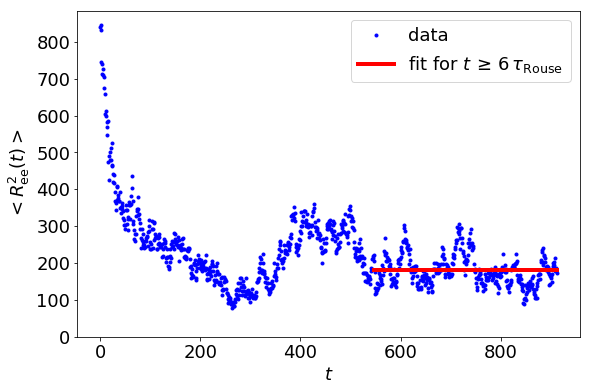

[  0.       0.9118   1.8236 ... 909.9764 910.8882 911.8   ] [1.97215226e-31 1.93239004e-01 1.67933864e-01 ... 2.59074442e+02
 2.61981514e+02 2.62466794e+02]


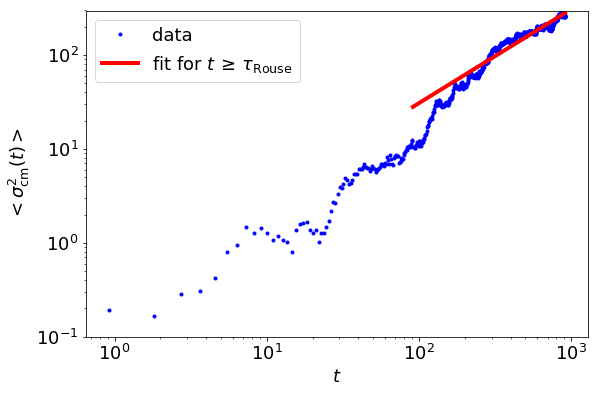

factor_sigma (simultaion)= [0.30779399] +/- [0.0009758]


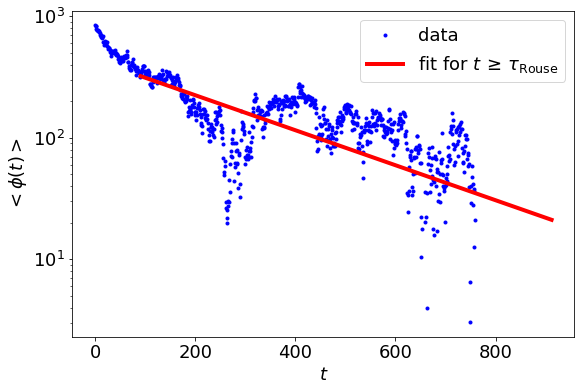

rouse time (simulation) = 301.210759044846 +/- 12.432446368363909


In [12]:
%run results_representation.ipynb